In [13]:
import json
import numpy as np
import pandas as pd

loc = "/Users/manaknarang/MANAK/Datasets/TCPD/datasets/quality_control_1/quality_control_1.json"
with open(loc, "r") as read_file:
    data = json.load(read_file)

In [14]:
import matplotlib.pyplot as plt

In [21]:
datapoints = data['series'][0]['raw']

In [22]:
dat = pd.DataFrame({'time' : np.arange(1,len(datapoints)+1),
                     'value' : datapoints})

In [23]:
dat['RMean20'] = dat.value.rolling(20).mean()
dat['RStd20'] = dat.value.rolling(20).std()


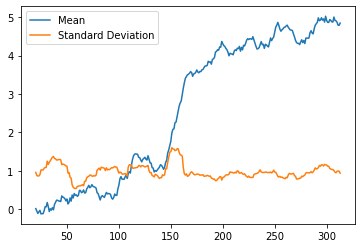

In [26]:
plt.plot(dat['time'],dat['RMean20'],label = "Mean")
plt.plot(dat['time'],dat['RStd20'],label = "Standard Deviation")
plt.legend()


In [27]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [33]:
model = linearRegression(np.array(dat['time']).reshape(-1,1).shape, np.array(dat['value']).reshape(-1,1).shape)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [36]:
dat

,time,value,RMean20,RStd20
0,1,1.718969,NaN,NaN
1,2,0.691285,NaN,NaN
2,3,-0.476868,NaN,NaN
3,4,0.427788,NaN,NaN
4,5,-0.348268,NaN,NaN
...,...,...,...,...
308,309,6.144980,4.906837,0.947591
309,310,3.704967,4.869734,0.980498
310,311,3.914936,4.793434,0.993005
311,312,6.248957,4.790175,0.987845


In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(np.array(dat['time']).reshape(-1,1),np.array(dat['value']).reshape(-1,1))

In [39]:
plt.plot(dat.time,lr.coef_*dat.time+lr.intercept_)


ValueError: Length of values (1) does not match length of index (313)

In [49]:
a = lr.coef_*np.arange(1,len(datapoints)+1) + lr.intercept_

313

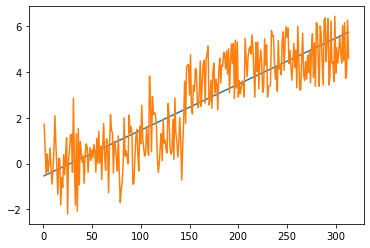

In [56]:
plt.plot(dat.time,a[0])
plt.plot(dat.time,dat.value)